# Семинар по трехмерной геометрии и градиентному спуску

## Трехмерная геометрия

### Теоретическая часть

#### Ответьте на вопросы:
*  Каким уравнением задается прямая на плоскости? Отличие y = kx + b и ax + by + c = 0
* Записать уравнение плоскости в трехмерном пространстве, гиперплоскости в многомерном пространстве. 
* В пространстве какой размерности задается гиперплоскость из предыдущего вопроса?
* Если какой-то из коэффициентов равен 0, что это геометрически означает?
* Что означает, что свободный член равен 0?

__Решение.__
* В школьных курсах прямая на плоскости задается уравнением $y=kx + b$. Здесь $k$ отвечает за наклон прямой, а $b$ - за смещение по оси ординат. В университетских курсах прямую обычно задают уравнением $ax + by + c = 0$. Это более общий случай: в таком виде можно в том числе задать прямую, параллельную оси ординат, установив $b=0$. В этом отличие от уравнения $y=kx + b$: здесь коэффициент при $y$ равен 1, и прямую, параллельную оси ординат, задать нельзя.
* Уравнения плоскости в трехмерном пространстве задается аналогично: $ax + by +cz + d = 0$. Любую плоскость можно задать таким уравнением, причем не единственным образом. Обобщим уравнение на произвольную размерность: $w_1 x_1 + \dots w_d x_d + w_0 = 0$. 
* Гиперплоскость $w_1 x_1 + \dots w_d x_d + w_0 = 0$ задается в пространстве размерности $d+1$.
* Если коэффициент $w_i=0$, гиперплоскость параллельна $i$-й оси.
* Если свободный член $w_0=0$, гиперплоскость проходит через начало координат $(0, \dots,  0)$.

### Практическая часть: визуализация функции от двух переменных

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [3]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

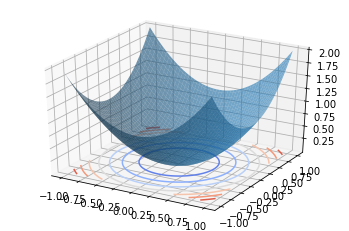

In [3]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

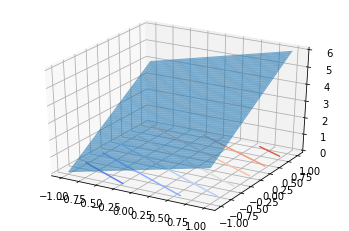

In [4]:
fun = lambda x1, x2 : x1 + 2 * x2 + 3
plot_3d(fun)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

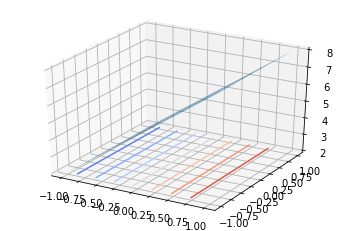

In [7]:
fun = lambda x1, x2 : x1*3 + 5
plot_3d(fun)

Нарисуйте плоскость, проходящую через начало координат:

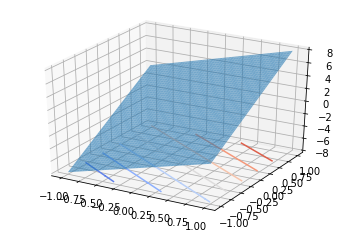

In [8]:
fun = lambda x1, x2 : 3*x1 + 5*x2
plot_3d(fun)

## Градиентный спуск

### Теоретическая часть

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных в точке $x_0$ - это вектор ее частных производных, вычисленных в точке $x_0$.
$$\nabla_x f \bigl | _{x_0} = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_d} \biggr ) \biggl | _{x_0}$$

Разберем два простых примера вычисления градиента в случае функции от двух переменных.

#### Задача 1.

Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__

Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1 + c_2 x_2)}{\partial x_1} = c_1.$$

Значит, первая компонента градиента равна $c_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (c_1, c_2)$$

Можно подставить конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. Тогда градиент будет равен $(3, 7)$. 

#### Задача 2.
Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__
Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1^2 + c_2 x_2^2)}{\partial x_1} = 2 c_1 x_1.$$

Значит, первая компонента градиента равна $2 c_1 x_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

__Вспомните из лекции:__
* Какую (оптимизационную) задачу решает градиентный спуск?
* Как работает алгоритм градиентного спуска?
* Как выбирать начальную инициализацию в градиентном спуске?
* Когда останавливать градиентный спуск?

### Практическая часть

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай произвольных коэффициентов:

In [11]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Эта функция способна обрабатывать x1 и x2 любой размерности, но градиенты будем считать в предположении, что x1 и x2 - числа (так проще)

Теперь надо реализовать градиент функции fun. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [13]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    return np.array([float(2*x1*c1), float(2*x2*c2)])
    

Проверьте правильность (сверьте с формулой):

In [14]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

Теперь реализуем градиентный спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [55]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20, tolerance=1e-7):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    x = np.random.rand(2) * 4 - 2
    res = []

    ### student's code here
    for i in range(num_steps):
        res.append(list(x))
        gr = grad_fun(x[0], x[1])
        if np.linalg.norm(gr) <= tolerance:
            break
        x = x - step_size * gr
    res.append(x)
    
    return np.array(res)

Протестируем функцию (последний элемент должен быть близок к 0):

In [56]:
trace = grad_descend(grad_fun)
trace

array([[0.53459294, 0.99521553],
       [0.42767435, 0.79617242],
       [0.34213948, 0.63693794],
       [0.27371159, 0.50955035],
       [0.21896927, 0.40764028],
       [0.17517541, 0.32611222],
       [0.14014033, 0.26088978],
       [0.11211227, 0.20871182],
       [0.08968981, 0.16696946],
       [0.07175185, 0.13357557],
       [0.05740148, 0.10686045],
       [0.04592118, 0.08548836],
       [0.03673695, 0.06839069],
       [0.02938956, 0.05471255],
       [0.02351165, 0.04377004],
       [0.01880932, 0.03501603],
       [0.01504745, 0.02801283],
       [0.01203796, 0.02241026],
       [0.00963037, 0.01792821],
       [0.0077043 , 0.01434257],
       [0.00616344, 0.01147405]])

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

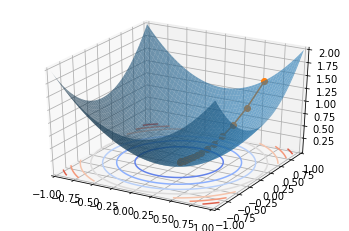

In [57]:
### student's code here
plot_3d(fun, trace=trace)

Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

In [ ]:
### student's code here


Попробуйте разную длину шага из множества (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

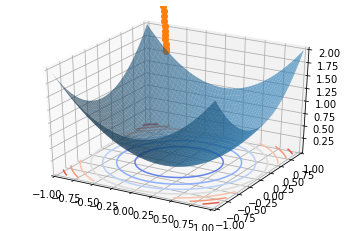

In [44]:
### student's code here
np.random.seed(5)
trace = grad_descend(grad_fun, step_size = 0.01)
plot_3d(fun, trace = trace)

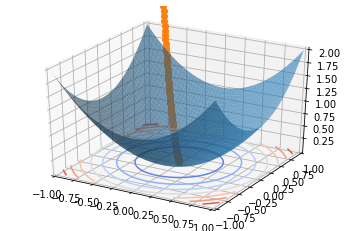

In [58]:
np.random.seed(5)
trace = grad_descend(grad_fun, num_steps = 1000 ,step_size = 0.01)
plot_3d(fun, trace = trace)

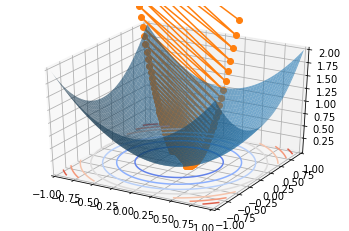

In [50]:
np.random.seed(15)
trace = grad_descend(grad_fun, num_steps = 100 ,step_size = 0.99)
plot_3d(fun, trace = trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

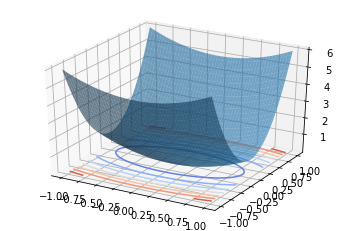

In [51]:
### student's code here
from functools import partial
narrow_fun = partial(fun, c1=1,c2=5)
plot_3d(narrow_fun)

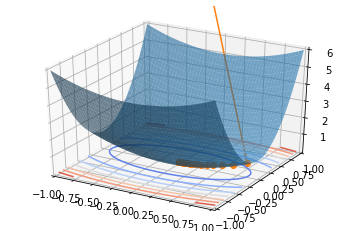

In [54]:
np.random.seed(10)
grad_fun_narrow = partial(grad_fun, c1 = 1, c2 = 5)
trace = grad_descend(grad_fun_narrow, num_steps=100, step_size=0.1)
plot_3d(narrow_fun, trace=trace)

"Вытянутую" функцию сложнее оптимизировать. Именно поэтому рекомендуется нормировать данные перед обучением модели, чтобы избежать таких колебаний при оптимизации.

In [77]:
def loss(y, y_pred):
    err = y - y_pred
    return err.dot(err)/len(y)

def grad(y, X, w):
    return X.T @ (X @ w - y) * 2 / len(w)

    
def grad_descent(X, y, step_size = 0.1, num_steps = 20, tolerance = 1e-7):
    w = np.random.rand(X.shape[1]) * 4 - 2
    trace = []
    norms = []
    for i in range(num_steps):
        grad_w = grad(y, X, w)
        norms.append(np.linalg.norm(grad_w))
        if np.linalg.norm(grad_w) < tolerance:
            return np.array(trace)
        w = w - step_size * grad_w
        trace.append(loss(y, X.dot(w)))
    return np.array(trace), w, norms

In [71]:
from sklearn.datasets import make_regression, load_boston

In [72]:
X, y = make_regression()

[653.4248556756921, 336.4227084323071, 211.3210383881348, 149.93839386749013, 114.64204367728398, 91.95753755744504, 76.21755932825083, 64.68800232442455, 55.89907096897403, 48.99352030192179, 43.43879937950113, 38.886630620030374, 35.09922379359055, 31.90822679812973, 29.190777143794627, 26.854924591248576, 24.830405476503667, 23.06259224858685, 21.508396358559757, 20.13341439164799, 18.9098905648123, 17.815230516775163, 16.830896750706195, 15.941574165413725, 15.134530508131206, 14.399120007369499, 13.726393877053015, 13.108791759213275, 12.539895275300001, 12.014229798725346, 11.527104054500365, 11.074479658516353, 10.652864535033705, 10.259225500990647, 9.890916318389253, 9.545618286030782, 9.221291034809099, 8.916131652521623, 8.628540627281001, 8.357093386548156, 8.100516438692818, 7.857667308545372, 7.627517607225459, 7.40913869695736, 7.201689509291365, 7.004406154599056, 6.816593025419758, 6.6376151490114745, 6.466891587553284, 6.303889719668985, 6.148120265759977, 5.999132943

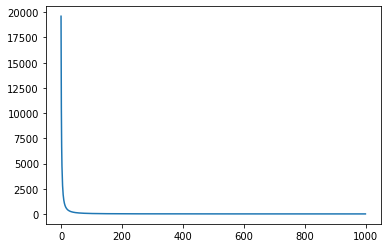

In [78]:
new_trace, w, grads = grad_descent(X, y, num_steps = 1000)
plt.plot(new_trace)
print(grads)

In [74]:
X_scaled = (X - X.mean(axis=0))/ X.std(axis = 0)

[-3.89721938e+00  3.31009694e+00  1.76831447e+00  3.50966291e+00
  5.74123021e+00  5.25991515e+01  4.24798506e+00  1.96348356e+00
  1.04293659e+01 -8.65192346e-01 -1.50690976e+00 -1.95459843e+00
  5.61977949e+00 -3.16852834e+00  8.72776203e+01  5.65344415e+00
  1.12440276e+00 -4.97363596e+00 -3.72764821e-02  2.86511598e-01
  1.86396106e+00 -1.27925401e+00  2.05958611e+01  3.67314183e+00
  9.25972449e+00  5.96778228e+00 -1.08271330e+01 -4.82967268e+00
  4.71839454e+00  4.07242327e+00  2.82079250e+00  9.36053712e+01
 -3.77082877e+00 -2.41155200e+00  5.30366825e+00  7.25009582e-01
  5.64720324e+00  5.28225274e+00  6.37534890e+00 -1.59615930e-01
  6.52294965e+01  1.01721183e+01  1.37616716e+01 -7.36294472e+00
  6.92601943e+00  1.23883390e+01 -1.52134818e+00 -8.28836212e+00
 -5.15453371e-01  8.12454469e-01 -4.47778287e+00  5.94324597e+00
  9.57715404e+00  3.79372878e+00  4.89666875e+00  9.54903601e-01
 -6.55085822e+00  3.11843071e+00 -3.58691663e+00  8.07359965e+01
  1.50754381e+00  2.77280

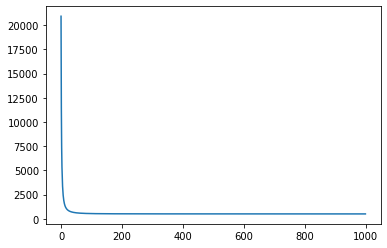

In [75]:
new_trace, w = grad_descent(X_scaled, y, num_steps = 1000)
plt.plot(new_trace)
print(w)

In [79]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_scaled, y)
lr.coef_

array([-1.33337928e+15, -1.20849570e+15,  7.78238399e+14, -1.61372249e+14,
       -1.16144023e+15,  2.53022511e+14, -6.78821326e+13, -1.20873981e+14,
       -1.41208684e+15, -2.13510965e+13, -1.08734787e+15, -1.05348289e+15,
       -1.13920657e+15,  2.82341027e+14,  1.01680342e+15,  6.11513888e+13,
       -9.48205016e+14,  9.66858427e+14, -1.75617323e+15,  6.28078133e+13,
        3.08901916e+14,  1.52441590e+13, -3.74946493e+14, -5.56979510e+14,
        5.90805558e+14, -5.43181900e+14, -2.43152249e+14,  5.44881916e+14,
       -1.23057450e+14,  2.04406878e+14,  5.04130417e+14,  3.79981595e+14,
       -7.12163253e+14, -4.96321114e+13,  1.51031490e+14,  1.31087882e+15,
        3.07746337e+14,  6.92640913e+13, -3.68233705e+14, -3.15671710e+14,
       -6.37751368e+14,  1.11852187e+15, -8.49644458e+14,  3.07125699e+14,
       -1.47390934e+15, -4.54805452e+12, -1.53284356e+14, -1.99415819e+14,
        2.05385909e+14, -6.65093853e+14,  2.37810030e+14, -9.11579831e+14,
        1.86361795e+14, -